# **Data Analytics Assignment: FoodExpress Platform**

In [3]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy as sp
import sklearn as sk 
import warnings
# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

***Dataset Load***

In [4]:
df = pd.read_csv("foodexpress_data_uncleaned - foodexpress_data_uncleaned.csv")
df.head(25)

,OrderID,OrderDate,OrderTime,City,CustomerSegment,CuisineType,RestaurantID,RestaurantRating,OrderValue,DeliveryFee,...,CashPayment,CardPayment,WalletPayment,UPIPayment,DiscountAmount,PromoDiscount,TipAmount,TimePeriod,WeatherCondition,DayOfWeek
0,5001,2024-09-21,11:01,East Zone,New Customer,Fast Food,136,3.1,23.94,1.69,...,23.94,0.00,0.00,0.00,1.96,0.00,3.33,Morning,Clear,Saturday
1,5002,2024-09-01,13:44,West Zone,Regular Customer,Mexican,140,4.6,18.58,4.58,...,0.00,18.58,0.00,0.00,2.71,0.00,3.40,Afternoon,Cloudy,Sunday
2,5003,2024-09-20,19:36,South Zone,VIP Customer,Chinese,112,4.3,79.19,9.53,...,0.00,79.19,0.00,0.00,2.49,0.00,0.00,Evening,Cloudy,Friday
3,5004,2024-09-30,10:38,South Zone,VIP Customer,Fast Food,142,4.7,39.85,8.91,...,0.00,0.00,0.00,39.85,0.19,0.00,0.00,Morning,Stormy,Monday
4,5005,2024-09-09,10:13,East Zone,New Customer,American,202,3.9,15.15,5.18,...,0.00,0.00,0.00,15.15,2.27,0.00,3.15,Morning,Rainy,Monday
5,5006,2024-09-28,11:09,South Zone,VIP Customer,Japanese,117,4.4,57.77,7.38,...,0.00,0.00,0.00,57.77,6.51,1.97,3.76,Morning,Stormy,Saturday
6,5007,2024-09-06,22:00,East Zone,VIP Customer,Indian,230,4.1,71.29,7.20,...,71.29,0.00,0.00,0.00,0.01,0.00,0.00,Night,Cloudy,Friday
7,5008,2024-09-30,19:56,East Zone,New Customer,Italian,162,3.3,27.76,9.92,...,27.76,0.00,0.00,0.00,1.10,1.17,0.00,Evening,Clear,Monday
8,5009,2024-09-07,14:45,East Zone,Regular Customer,Thai,213,3.4,23.68,1.54,...,0.00,0.00,0.00,23.68,0.81,2.04,0.00,Afternoon,Clear,Saturday
9,5010,2024-09-08,16:42,West Zone,New Customer,Indian,247,NaN,29.18,7.17,...,0.00,0.00,0.00,29.18,0.24,1.89,0.00,Afternoon,Rainy,Sunday


# **Section 1: Python Fundamentals (3 Questions)**

*1.Python Loops: Total Revenue Calculation*

In [5]:
# Calculate total revenue using a loop
total_revenue = 0

for value in df['OrderValue']:
    total_revenue += value

print(f"Total Revenue: ${total_revenue:.2f}")


Total Revenue: $35575.93


*2.Python Conditionals: Premium Delivery Identifier*

In [6]:
def is_premium_delivery(order_id):
    # Check if OrderID exists
    order = df[df['OrderID'] == order_id]
    if order.empty:
            return False      
    delivery_fee = order.iloc[0]['DeliveryFee']   
    delivery_time = order.iloc[0]['DeliveryTime']
    if delivery_fee > 5 and delivery_time < 25:
        return True
    else:
        return False
    
print(is_premium_delivery(5001))
print(is_premium_delivery(5030))

False
False


*3.Python Functions: Average Order Value by Cuisine*

In [7]:
def get_average_order_value(cuisine_type):
# Your code here
          cuisine_orders = df[df['CuisineType'] == cuisine_type]
          if cuisine_orders.empty:
                    return 0
          average_value = cuisine_orders['OrderValue'].mean()
          return average_value
avg_value = get_average_order_value("Italian")
print(f"Average order value for Italian cuisine: ${avg_value:.2f}")


Average order value for Italian cuisine: $37.10


# **Section 3: Data Cleaning and Reshaping Questions (7Questions)**

# **Data Set Explore**

In [8]:
df.isnull().sum()

OrderID                   0
OrderDate                 0
OrderTime                 0
City                      0
CustomerSegment           0
CuisineType               0
RestaurantID              0
RestaurantRating         75
OrderValue                0
DeliveryFee               0
DeliveryTime             70
DeliveryDistance          0
CustomerRating           79
DeliveryPartnerRating     0
CashPayment               0
CardPayment               0
WalletPayment             0
UPIPayment                0
DiscountAmount            0
PromoDiscount             0
TipAmount                70
TimePeriod                0
WeatherCondition          0
DayOfWeek                 0
dtype: int64

In [9]:
df.describe()

,OrderID,RestaurantID,RestaurantRating,OrderValue,DeliveryFee,DeliveryTime,DeliveryDistance,DeliveryPartnerRating,CashPayment,CardPayment,WalletPayment,UPIPayment,DiscountAmount,PromoDiscount,TipAmount
count,1000.000000,1000.000000,925.000000,1000.000000,1000.000000,930.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,930.000000
mean,5500.500000,172.903000,4.021514,35.575930,6.367470,1650.787097,7.64239,4.238300,9.243040,9.398340,8.155890,9.059590,2.742990,0.71045,1.233634
std,288.819436,43.761658,0.563848,17.832962,2.435555,12598.997033,4.14388,0.428003,18.301387,18.010375,17.511655,17.554717,2.202312,1.27871,1.922523
min,5001.000000,101.000000,3.000000,3.150000,1.500000,6.000000,0.51000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,5250.750000,134.000000,3.500000,22.207500,4.315000,23.000000,4.07750,3.900000,0.000000,0.000000,0.000000,0.000000,1.067500,0.00000,0.000000
50%,5500.500000,172.000000,4.000000,32.235000,6.805000,36.000000,7.65000,4.200000,0.000000,0.000000,0.000000,0.000000,2.195000,0.00000,0.000000
75%,5750.250000,211.000000,4.500000,46.302500,8.500000,49.000000,11.15250,4.600000,9.935000,13.102500,0.000000,10.112500,3.872500,0.98000,2.297500
max,6000.000000,250.000000,5.000000,79.970000,9.990000,99999.000000,14.97000,5.000000,79.090000,79.190000,79.970000,79.240000,11.190000,6.94000,7.820000


In [10]:
duplicates = df.duplicated().sum()  # Count duplicates
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   OrderID                1000 non-null   int64  
 1   OrderDate              1000 non-null   object 
 2   OrderTime              1000 non-null   object 
 3   City                   1000 non-null   object 
 4   CustomerSegment        1000 non-null   object 
 5   CuisineType            1000 non-null   object 
 6   RestaurantID           1000 non-null   int64  
 7   RestaurantRating       925 non-null    float64
 8   OrderValue             1000 non-null   float64
 9   DeliveryFee            1000 non-null   float64
 10  DeliveryTime           930 non-null    float64
 11  DeliveryDistance       1000 non-null   float64
 12  CustomerRating         921 non-null    object 
 13  DeliveryPartnerRating  1000 non-null   float64
 14  CashPayment            1000 non-null   float64
 15  CardP

*1.Handle Missing Values*

In [12]:
num_col=['RestaurantRating', 'DeliveryTime', 'CustomerRating', 'TipAmount']

for col in num_col:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].fillna(df[col].mean())

categorical_col=df.select_dtypes(include=['object']).columns
for col in categorical_col:
     df[col] = df[col].fillna(df[col].mode()[0])

df.isnull().sum()

OrderID                  0
OrderDate                0
OrderTime                0
City                     0
CustomerSegment          0
CuisineType              0
RestaurantID             0
RestaurantRating         0
OrderValue               0
DeliveryFee              0
DeliveryTime             0
DeliveryDistance         0
CustomerRating           0
DeliveryPartnerRating    0
CashPayment              0
CardPayment              0
WalletPayment            0
UPIPayment               0
DiscountAmount           0
PromoDiscount            0
TipAmount                0
TimePeriod               0
WeatherCondition         0
DayOfWeek                0
dtype: int64

*2.Replace Unclean Data*

In [13]:
# Count how many outliers 
outlier_count = (df['DeliveryTime'] == 99999).sum()

print("Number of outliers:", outlier_count)

median_value = df['DeliveryTime'].median()

df['DeliveryTime'] = df['DeliveryTime'].replace(99999, median_value)
df['DeliveryTime'].describe()



Number of outliers: 15


count    1000.000000
mean      151.357097
std       412.238036
min         6.000000
25%        24.000000
50%        37.000000
75%        52.000000
max      1650.787097
Name: DeliveryTime, dtype: float64

*3.Clean String Values*

In [14]:
df['CustomerRating'] = pd.to_numeric(df['CustomerRating'], errors='coerce')

#  missing values with median
median_rating = df['CustomerRating'].median()
df['CustomerRating'].fillna(median_rating, inplace=True)

#  Verify the data type
print(df['CustomerRating'].dtype)

float64


*4.Fix Data Types*

In [15]:
# Convert OrderDate to datetime
df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')

# Clean CustomerRating and RestaurantRating, convert to float
df['CustomerRating'] = pd.to_numeric(df['CustomerRating'], errors='coerce')
df['RestaurantRating'] = pd.to_numeric(df['RestaurantRating'], errors='coerce')

# Impute missing values with median
df['CustomerRating'].fillna(df['CustomerRating'].median(), inplace=True)
df['RestaurantRating'].fillna(df['RestaurantRating'].median(), inplace=True)

# Convert OrderValue and DeliveryFee to float
df['OrderValue'] = pd.to_numeric(df['OrderValue'], errors='coerce')
df['DeliveryFee'] = pd.to_numeric(df['DeliveryFee'], errors='coerce')

# Verify data types
print(df.dtypes)


OrderID                           int64
OrderDate                datetime64[ns]
OrderTime                        object
City                             object
CustomerSegment                  object
CuisineType                      object
RestaurantID                      int64
RestaurantRating                float64
OrderValue                      float64
DeliveryFee                     float64
DeliveryTime                    float64
DeliveryDistance                float64
CustomerRating                  float64
DeliveryPartnerRating           float64
CashPayment                     float64
CardPayment                     float64
WalletPayment                   float64
UPIPayment                      float64
DiscountAmount                  float64
PromoDiscount                   float64
TipAmount                       float64
TimePeriod                       object
WeatherCondition                 object
DayOfWeek                        object
dtype: object


*5.Remove Outliers*

In [16]:
# Calculate 99th percentile for DeliveryTime
percent_99 = df['DeliveryTime'].quantile(0.99)
print(f"99th percentile of DeliveryTime: {percent_99}")

#  Identify outliers
outliers = (df['DeliveryTime'] > percent_99) | (df['OrderValue'] < 5)
print(f"Rows identified as outliers:\n{df[outliers]}")

# Remove outliers
df_cleaned = df[~outliers].reset_index(drop=True)

# Report how many rows were removed
num_removed = outliers.sum()
print(f"Number of rows removed: {num_removed}")



99th percentile of DeliveryTime: 1650.7870967741935
Rows identified as outliers:
     OrderID  OrderDate OrderTime        City   CustomerSegment CuisineType  \
10      5011 2024-09-02     20:46   East Zone      New Customer   Fast Food   
95      5096 2024-09-26     16:39   West Zone      New Customer   Fast Food   
123     5124 2024-09-26     17:53  North Zone  Regular Customer    American   
137     5138 2024-09-30     16:05   East Zone  Regular Customer     Chinese   
193     5194 2024-09-05     23:00  North Zone      VIP Customer    Japanese   
285     5286 2024-09-05      8:04  North Zone      New Customer    American   
468     5469 2024-09-21     16:55  South Zone  Regular Customer   Fast Food   
535     5536 2024-09-07     14:36   West Zone      VIP Customer        Thai   
547     5548 2024-09-01     22:02   East Zone  Regular Customer   Fast Food   
704     5705 2024-09-07     18:57   East Zone  Regular Customer     Chinese   

     RestaurantID  RestaurantRating  OrderValue  

*6.Reshape Data Using Melt*

In [17]:
df_long = pd.melt(
    df, 
    id_vars=['OrderID'],              
    value_vars=['CashPayment','CardPayment','WalletPayment','UPIPayment'],  
    var_name='PaymentMethod',       
    value_name='PaymentAmount'        
)

df_long = df_long[df_long['PaymentAmount'] > 0].reset_index(drop=True)
print("\nFiltered (PaymentAmount > 0):\n", df_long)




Filtered (PaymentAmount > 0):
      OrderID PaymentMethod  PaymentAmount
0       5001   CashPayment          23.94
1       5007   CashPayment          71.29
2       5008   CashPayment          27.76
3       5013   CashPayment          52.66
4       5017   CashPayment          29.14
..       ...           ...            ...
995     5978    UPIPayment          26.24
996     5986    UPIPayment           9.14
997     5987    UPIPayment          29.18
998     5992    UPIPayment          56.65
999     6000    UPIPayment           8.58

[1000 rows x 3 columns]


*7.Feature Engineering: Net Revenue*


In [18]:
df['RestaurantCommission'] = df['OrderValue'] * 0.20
df['NetRevenue'] = df['OrderValue'] - (df['DiscountAmount'] + df['PromoDiscount']) - df['RestaurantCommission']


city_net_revenue = df.groupby('City')['NetRevenue'].sum().sort_values(ascending=False)

highest_city = city_net_revenue.idxmax()
top_revenue = city_net_revenue.max()
print(f"\nHighest Net Revenue: {highest_city} with {top_revenue}")


Highest Net Revenue: North Zone with 6625.218


# **Section 4: Visualization Questions (6 Questions)**

**1.Bar Chart: Total Orders by Cuisine Type**

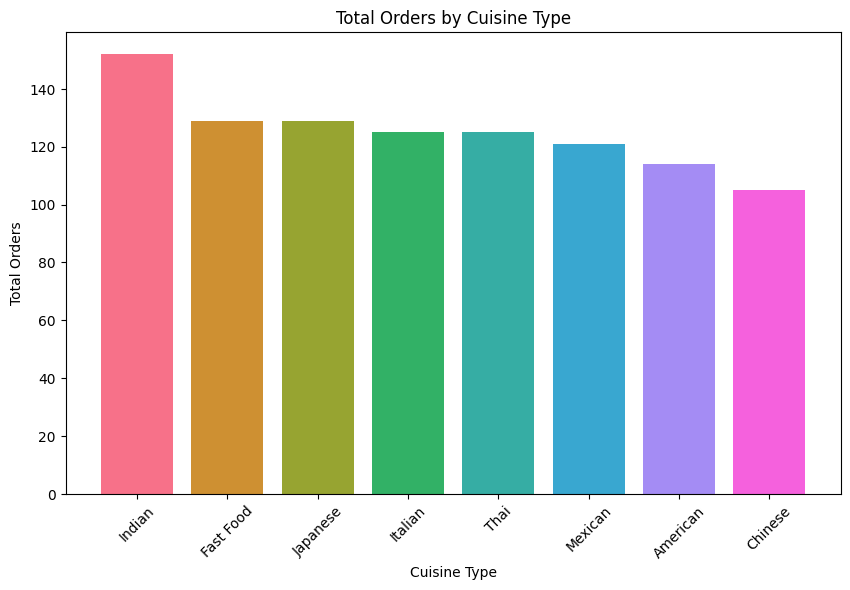

In [19]:
# Count total orders by cuisine
cuisine_counts = df['CuisineType'].value_counts()

# Set color palette
colors = sns.color_palette("husl", len(cuisine_counts))
# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(cuisine_counts.index, cuisine_counts.values, color=colors)

plt.title("Total Orders by Cuisine Type")
plt.xlabel("Cuisine Type")
plt.ylabel("Total Orders")
plt.xticks(rotation=45)

plt.show()

**2.Histogram: Delivery Time Distribution**

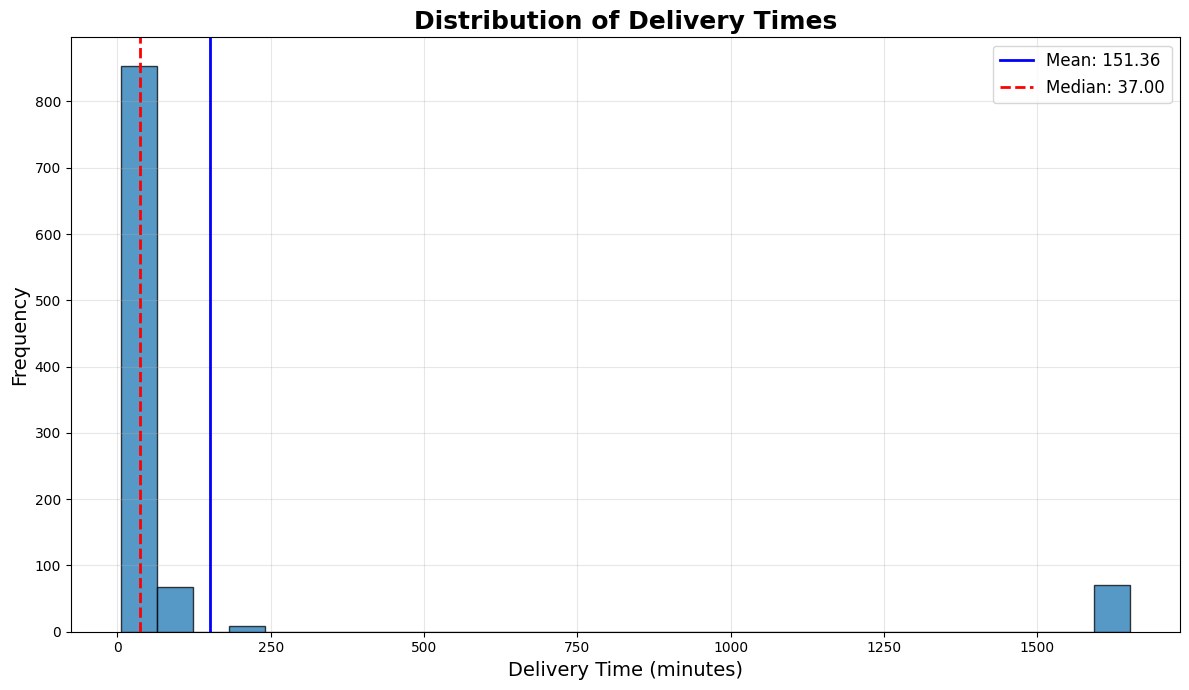

In [20]:
# Convert DeliveryTime to numeric and clean
df['DeliveryTime'] = pd.to_numeric(df['DeliveryTime'], errors='coerce')

# Replace invalid 99999 values with median
median_clean = df['DeliveryTime'].median()
df['DeliveryTime'] = df['DeliveryTime'].replace(99999, median_clean)

# Drop missing values 
delivery_times = df['DeliveryTime'].dropna()

# Calculate mean and median
mean_val = delivery_times.mean()
median_val = delivery_times.median()

# Enhanced Histogram
plt.figure(figsize=(12, 7))

# Histogram with transparency + edge color + better bins
plt.hist(delivery_times, bins=28, alpha=0.75, edgecolor='black')

# Mean & median lines
plt.axvline(mean_val, color='blue', linewidth=2, label=f"Mean: {mean_val:.2f}")
plt.axvline(median_val, color='red', linestyle='--', linewidth=2, label=f"Median: {median_val:.2f}")

# Title and labels (bigger & bold)
plt.title("Distribution of Delivery Times", fontsize=18, fontweight='bold')
plt.xlabel("Delivery Time (minutes)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Grid for readability
plt.grid(alpha=0.3)

# Legend
plt.legend(fontsize=12)

# Layout adjust
plt.tight_layout()

# Show plot
plt.show()


**3.Pie Chart: Customer Segment Proportion**

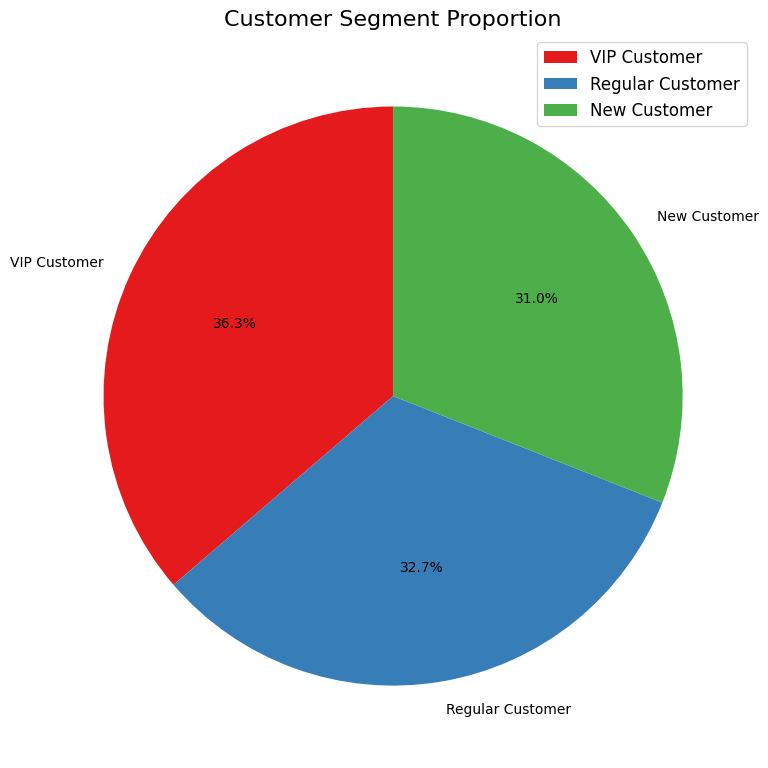

In [21]:
# Count orders by customer segment
count_segment = df['CustomerSegment'].value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    count_segment,
    labels=count_segment.index,
    autopct='%1.1f%%',      
    startangle=90,
    colors=plt.cm.Set1(range(len(count_segment)))  ,
)

plt.title("Customer Segment Proportion", fontsize=16)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


**4.Scatterplot: Order Value vs. Delivery Time**

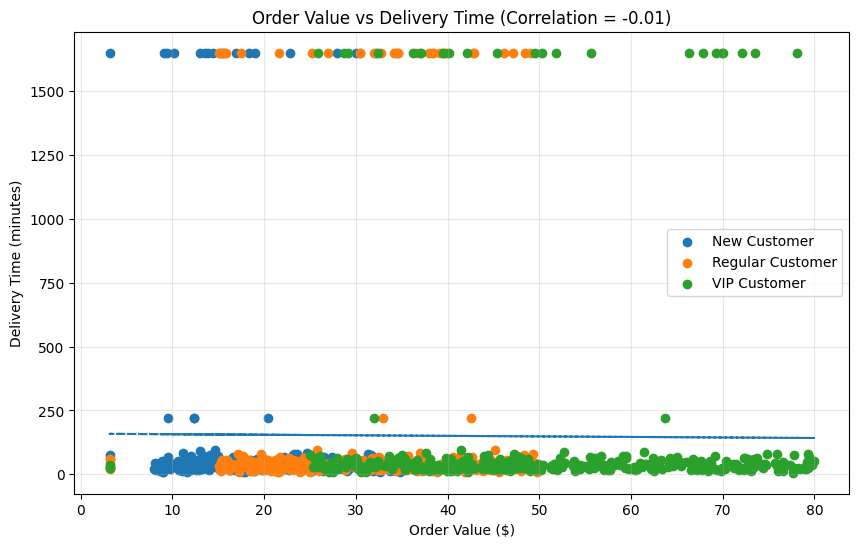

In [22]:
# Convert numeric columns
df['OrderValue'] = pd.to_numeric(df['OrderValue'], errors='coerce')
df['DeliveryTime'] = pd.to_numeric(df['DeliveryTime'], errors='coerce')

# Clean invalid DeliveryTime
median_time = df['DeliveryTime'].median()
df['DeliveryTime'] = df['DeliveryTime'].replace(99999, median_time)

# Drop missing
clean_df = df.dropna(subset=['OrderValue', 'DeliveryTime', 'CustomerSegment'])

# Scatter plot
plt.figure(figsize=(10, 6))

segments = clean_df['CustomerSegment'].unique()

for seg in segments:
    seg_data = clean_df[clean_df['CustomerSegment'] == seg]
    plt.scatter(seg_data['OrderValue'], seg_data['DeliveryTime'], label=seg)

# Trend line
x = clean_df['OrderValue']
y = clean_df['DeliveryTime']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), linestyle='--')

# Correlation
corr = x.corr(y)

# Labels & title
plt.title(f"Order Value vs Delivery Time (Correlation = {corr:.2f})")
plt.xlabel("Order Value ($)")
plt.ylabel("Delivery Time (minutes)")
plt.legend()
plt.grid(alpha=0.3)

plt.show()


**5.Boxplot: Delivery Time by City**

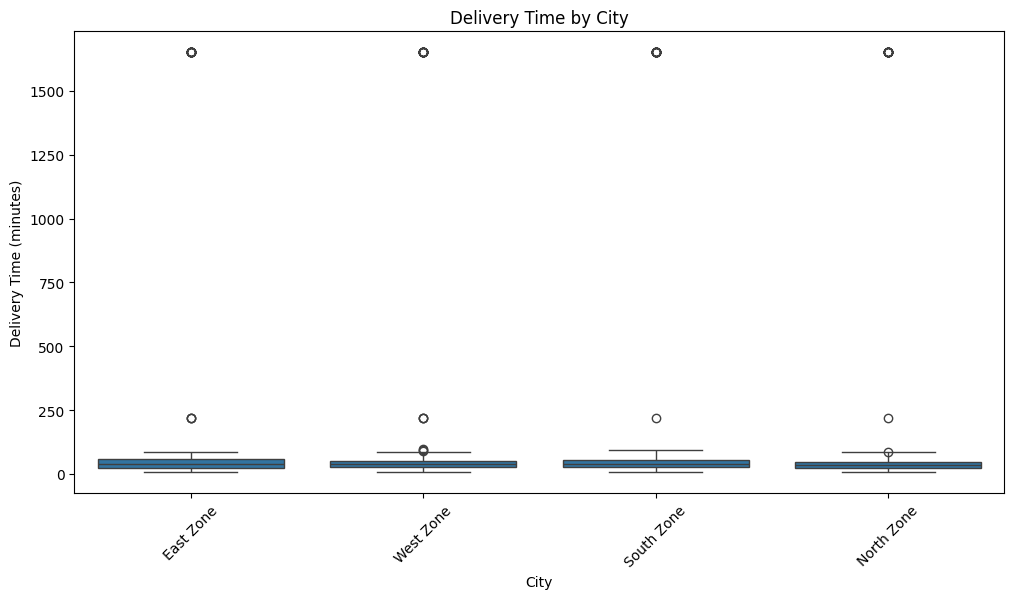

In [23]:
plt.figure(figsize=(12, 6))

# Create boxplot
sns.boxplot(x='City', y='DeliveryTime', data=df)

# Title and labels
plt.title("Delivery Time by City")
plt.xlabel("City")
plt.ylabel("Delivery Time (minutes)")

# Rotate x labels
plt.xticks(rotation=45)

plt.show()


**6.Line Chart: Daily Order Trends**

In [24]:
# Group by Date and Cuisine
daily_orders = df.groupby(['OrderDate','CuisineType']).size().reset_index(name='NumOrders')

# Line Chart with Plotly
fig = px.line(
    daily_orders,
    x='OrderDate',
    y='NumOrders',
    color='CuisineType',
    markers=True,
    title='Daily Order Trends by Cuisine'
)
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Number of Orders',
    legend_title='CuisineType',
    xaxis=dict(tickformat='%Y-%m-%d')
)
fig.show()


# **Section 5: Statistical Test Questions (10 Questions)**

**T-Tests**

*1. Independent Samples T-Test: Premium vs. Regular Customers*

T-statistic: nan, P-value: nan
Fail to reject the null hypothesis: No significant difference in ratings between VIP and Regular customers.


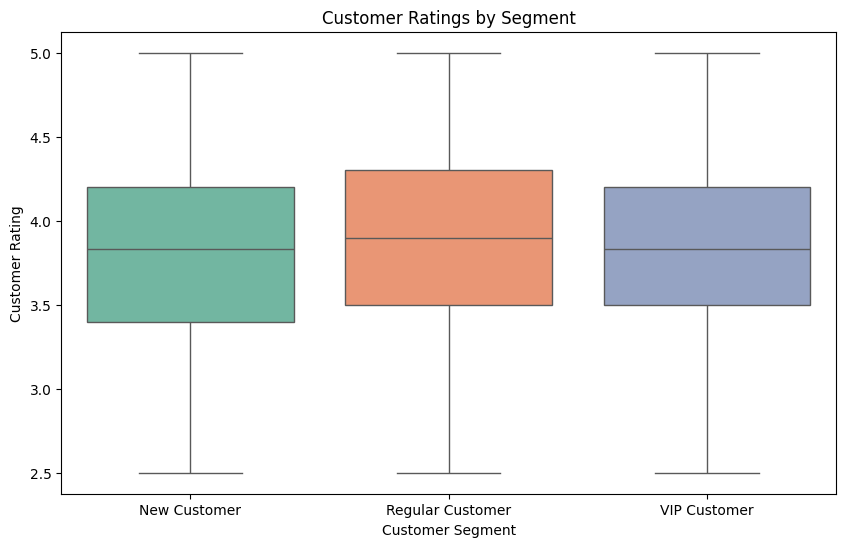

In [25]:
#code
df['CustomerRating']=pd.to_numeric(df['CustomerRating'],errors='coerce')

df=df.dropna(subset=['CustomerRating','CustomerSegment'])

vip_ratings = df[df['CustomerSegment'] == 'VIP']['CustomerRating']
regular_ratings = df[df['CustomerSegment'] == 'Regular Customer']['CustomerRating']

t_stat, p_value = sp.stats.ttest_ind(vip_ratings, regular_ratings, equal_var=False)

print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")


#decision making
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference in ratings between VIP and Regular customers.")
else:
    print("Fail to reject the null hypothesis: No significant difference in ratings between VIP and Regular customers.")


#visulaization
plt.figure(figsize=(10, 6))
sns.boxplot(x='CustomerSegment', y='CustomerRating', data=df, palette='Set2')
plt.title("Customer Ratings by Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Customer Rating")
plt.show()


**2. One-Sample T-Test: Delivery Time Target**

In [26]:
#code
df['DeliveryTime']=pd.to_numeric(df['DeliveryTime'],errors='coerce')
north_zone = df[df['City'] == 'North Zone']['DeliveryTime'].dropna()

t_stat, p_value = sp.stats.ttest_1samp(north_zone, 30)

print("T-statistic:", t_stat)
print("P-value:", p_value )

alpha = 0.05

if p_value < alpha:
    print("Decision: Reject Null Hypothesis")
else:
    print("Decision: Fail to Reject Null Hypothesis")

T-statistic: 4.13147978864909
P-value: 4.874292395776334e-05
Decision: Reject Null Hypothesis


**Chi-Square Tests** 

**3. Chi-Square Test of Independence: Payment Method and Customer
Segment**

In [27]:
#code
from scipy.stats import chi2_contingency

def payment_method(row):
    if row['CashPayment'] > 0:
        return 'Cash'
    elif row['CardPayment'] > 0:
        return 'Card'
    elif row['WalletPayment'] > 0:
        return 'Wallet'
    elif row['UPIPayment'] > 0:
        return 'UPI'
    else:
        return 'Unknown'

df['PaymentMethod'] = df.apply(payment_method, axis=1)

# Contingency Table
contingency_table = pd.crosstab(df['PaymentMethod'], df['CustomerSegment'])
print("Contingency Table:\n", contingency_table)


# Chi-Square Test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Expected frequencies
expected_df = pd.DataFrame(
    expected,
    index=contingency_table.index,
    columns=contingency_table.columns
)

print("\nChi-Square stat:", chi2)
print("P-Value:", p_value)
print("\nExpected Frequencies:\n", expected_df)

# α = 0.05
alpha = 0.05
if p_value < alpha:
    print("\nDecision: Reject H0")
    print("Payment method and customer segment are associated.")
else:
    print("\nDecision: Fail to Reject H0")
    print("Payment method and customer segment are independent.")

Contingency Table:
 CustomerSegment  New Customer  Regular Customer  VIP Customer
PaymentMethod                                                
Card                       77                84           100
Cash                       82                75            97
UPI                        84                98            83
Wallet                     67                70            83

Chi-Square stat: 5.20211974922005
P-Value: 0.5181635325898712

Expected Frequencies:
 CustomerSegment  New Customer  Regular Customer  VIP Customer
PaymentMethod                                                
Card                    80.91            85.347        94.743
Cash                    78.74            83.058        92.202
UPI                     82.15            86.655        96.195
Wallet                  68.20            71.940        79.860

Decision: Fail to Reject H0
Payment method and customer segment are independent.


**4. Chi-Square Goodness of Fit: Cuisine Distribution**

In [28]:
from scipy.stats import chisquare


cuisine = ['Italian', 'Chinese', 'Indian', 'Fast Food', 'Mexican']
filtered_df = df[df['CuisineType'].isin(cuisine)]

# Observed frequencies
observed = filtered_df['CuisineType'].value_counts().sort_index()

# Total orders
total_orders = observed.sum()

# Expected frequencies 
expected = [0.20 * total_orders] * len(observed)

# Chi-Square Goodness of Fit Test
chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

# Print Results
print("Observed Frequencies:\n", observed)
print("\nExpected Frequencies:\n", expected)
print("\nChi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)

# Decision using alpha = 0.05
alpha = 0.05

if p_value < alpha:
    print("\nDecision: Reject H0")
else:
    print("\nDecision: Fail to Reject H0")


Observed Frequencies:
 CuisineType
Chinese      105
Fast Food    129
Indian       152
Italian      125
Mexican      121
Name: count, dtype: int64

Expected Frequencies:
 [126.4, 126.4, 126.4, 126.4, 126.4]

Chi-Square Statistic: 9.10759493670886
P-Value: 0.058465669331525194

Decision: Fail to Reject H0


**Correlation Analysis**

**5. Correlation Analysis: Order Value, Delivery Time, and Ratings**

Order Value vs Customer Rating: 0.02831808563761637 p-value: 0.37102454724052913
Delivery Time vs Customer Rating: -0.05392512255129604 p-value: 0.08831207877706967
Order Value vs Delivery Time: -0.009165285875922443 p-value: 0.7722176258940993


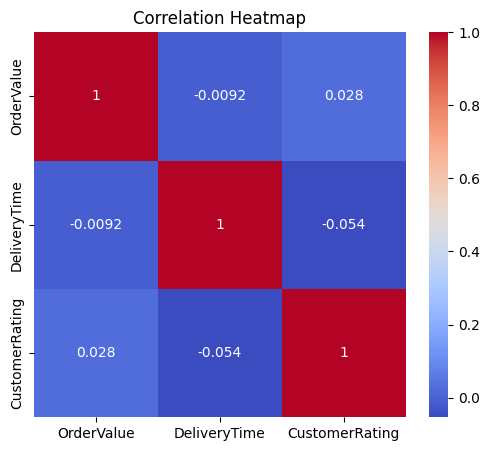

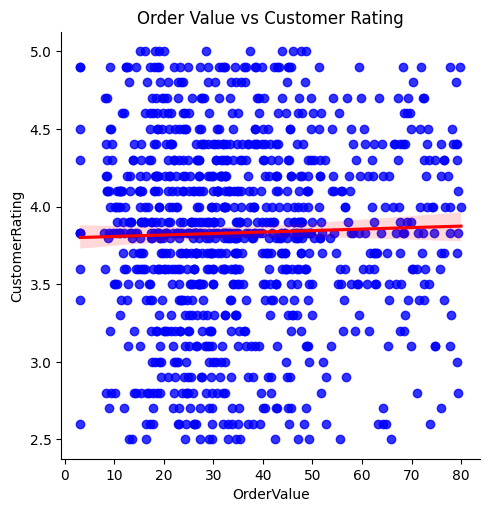

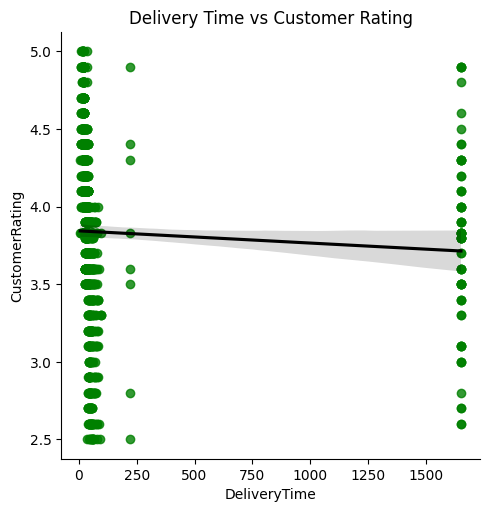

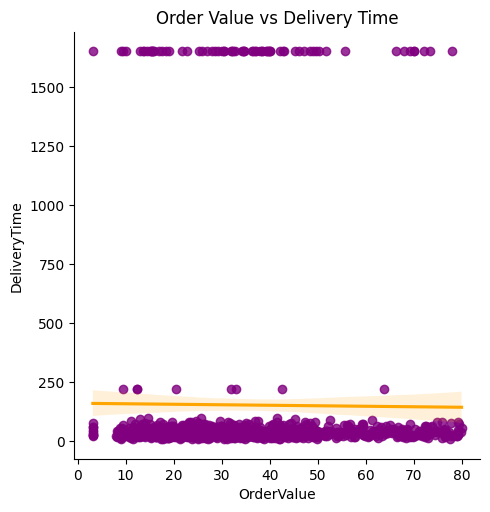

In [29]:
#code
from scipy.stats import pearsonr

# Convert to numeric
cols = ['OrderValue', 'DeliveryTime', 'CustomerRating']
for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop missing values
df = df.dropna(subset=cols)

#Correlation
corr_odv_cr, p1 = pearsonr(df['OrderValue'], df['CustomerRating'])
corr_dt_cr, p2 = pearsonr(df['DeliveryTime'], df['CustomerRating'])
corr_odv_dt, p3 = pearsonr(df['OrderValue'], df['DeliveryTime'])

print("Order Value vs Customer Rating:", corr_odv_cr, "p-value:", p1)
print("Delivery Time vs Customer Rating:", corr_dt_cr, "p-value:", p2)
print("Order Value vs Delivery Time:", corr_odv_dt, "p-value:", p3)

# Correlation Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Scatterplots 
import seaborn as sns
import matplotlib.pyplot as plt

# Order Value vs Customer Rating
sns.lmplot(
    x='OrderValue',
    y='CustomerRating',
    data=df,
    scatter_kws={'color': 'blue'},
    line_kws={'color': 'red'}
)
plt.title("Order Value vs Customer Rating")
plt.show()


# Delivery Time vs Customer Rating
sns.lmplot(
    x='DeliveryTime',
    y='CustomerRating',
    data=df,
    scatter_kws={'color': 'green'},
    line_kws={'color': 'black'}
)
plt.title("Delivery Time vs Customer Rating")
plt.show()


# Order Value vs Delivery Time
sns.lmplot(
    x='OrderValue',
    y='DeliveryTime',
    data=df,
    scatter_kws={'color': 'purple'},
    line_kws={'color': 'orange'}
)
plt.title("Order Value vs Delivery Time")
plt.show()



**6. Multiple Correlation: Restaurant Rating Prediction**

OrderValue vs RestaurantRating: r = 0.019, p-value = 0.5457
DeliveryTime vs RestaurantRating: r = 0.008, p-value = 0.7934
DiscountAmount vs RestaurantRating: r = 0.028, p-value = 0.3686

Strongest Predictor: DiscountAmount


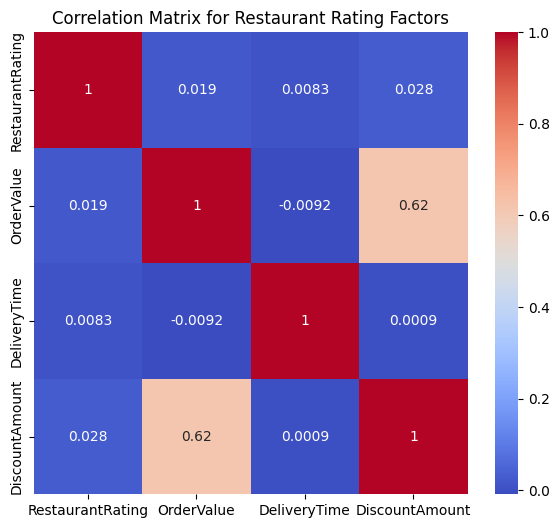

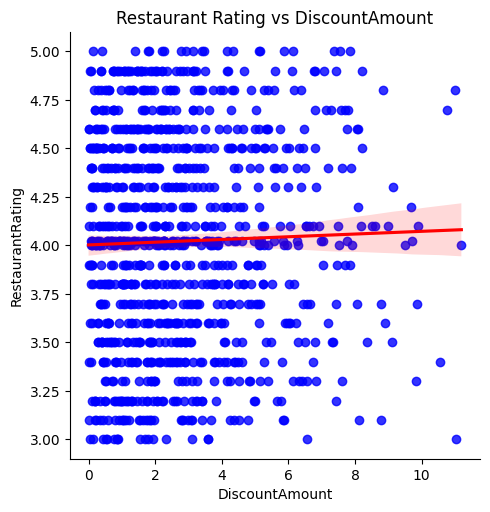

In [30]:
#code
from scipy.stats import pearsonr

cols = [
    'RestaurantRating',
    'OrderValue',
    'DeliveryTime',
    'DiscountAmount'
]

for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop missing values
df = df.dropna(subset=cols)

# Correlation Calculation
correlations = {}

for col in cols[1:]:
    r, p = pearsonr(df[col], df['RestaurantRating'])
    correlations[col] = r
    print(f"{col} vs RestaurantRating: r = {r:.3f}, p-value = {p:.4f}")

# Identify Strongest Predictor
strongest_factor = max(correlations, key=lambda x: abs(correlations[x]))
print("\nStrongest Predictor:", strongest_factor)

# Correlation Heatmap
plt.figure(figsize=(7, 6))
sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Restaurant Rating Factors")
plt.show()

# Scatterplot for Strongest Predictor
sns.lmplot(
    x=strongest_factor,
    y='RestaurantRating',
    data=df,
    scatter_kws={'color': 'blue'},
    line_kws={'color': 'red'}
)
plt.title(f"Restaurant Rating vs {strongest_factor}")
plt.show()


**ANOVA Tests**

**7. One-Way ANOVA: Delivery Time Across Cities**

             df        sum_sq        mean_sq         F   PR(>F)
C(City)     3.0  4.643763e+05  154792.103710  0.910618  0.43524
Residual  996.0  1.693059e+08  169985.824966       NaN      NaN

Tukey HSD Results:

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1     group2   meandiff p-adj    lower    upper   reject
---------------------------------------------------------------
 East Zone North Zone -47.9708 0.5613 -142.7271  46.7855  False
 East Zone South Zone   2.1169 0.9999  -94.5395  98.7733  False
 East Zone  West Zone -33.6173 0.7979 -128.3735   61.139  False
North Zone South Zone  50.0877 0.5284  -45.0768 145.2522  False
North Zone  West Zone  14.3536 0.9789  -78.8804 107.5876  False
South Zone  West Zone -35.7341 0.7687 -130.8986  59.4304  False
---------------------------------------------------------------


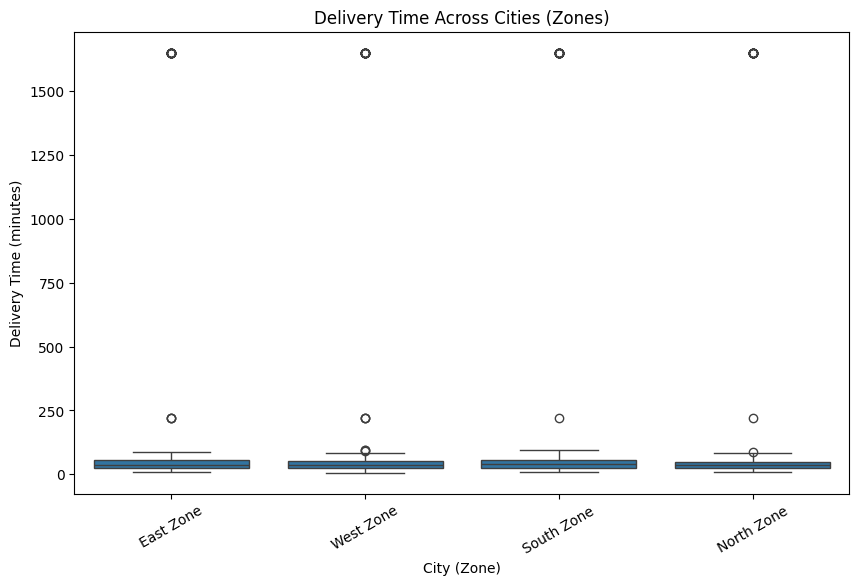

In [31]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Convert DeliveryTime to numeric and Drop missing values
df['DeliveryTime'] = pd.to_numeric(df['DeliveryTime'], errors='coerce')
df = df.dropna(subset=['DeliveryTime', 'City'])


# One-Way ANOVA using anova_lm
model = ols('DeliveryTime ~ C(City)', data=df).fit()
print(anova_lm(model))


# Tukey HSD
tukey = pairwise_tukeyhsd(endog=df['DeliveryTime'], groups=df['City'],alpha=0.05)
print("\nTukey HSD Results:\n")
print(tukey)


# Boxplot Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='City', y='DeliveryTime', data=df)
plt.title("Delivery Time Across Cities (Zones)")
plt.xlabel("City (Zone)")
plt.ylabel("Delivery Time (minutes)")
plt.xticks(rotation=30)

plt.show()


**Paired T-Tests**

**9. Paired T-Test: Weekend vs. Weekday Performance**

In [32]:
df.head() 

,OrderID,OrderDate,OrderTime,City,CustomerSegment,CuisineType,RestaurantID,RestaurantRating,OrderValue,DeliveryFee,...,UPIPayment,DiscountAmount,PromoDiscount,TipAmount,TimePeriod,WeatherCondition,DayOfWeek,RestaurantCommission,NetRevenue,PaymentMethod
0,5001,2024-09-21,11:01,East Zone,New Customer,Fast Food,136,3.1,23.94,1.69,...,0.00,1.96,0.0,3.33,Morning,Clear,Saturday,4.788,17.192,Cash
1,5002,2024-09-01,13:44,West Zone,Regular Customer,Mexican,140,4.6,18.58,4.58,...,0.00,2.71,0.0,3.40,Afternoon,Cloudy,Sunday,3.716,12.154,Card
2,5003,2024-09-20,19:36,South Zone,VIP Customer,Chinese,112,4.3,79.19,9.53,...,0.00,2.49,0.0,0.00,Evening,Cloudy,Friday,15.838,60.862,Card
3,5004,2024-09-30,10:38,South Zone,VIP Customer,Fast Food,142,4.7,39.85,8.91,...,39.85,0.19,0.0,0.00,Morning,Stormy,Monday,7.970,31.690,UPI
4,5005,2024-09-09,10:13,East Zone,New Customer,American,202,3.9,15.15,5.18,...,15.15,2.27,0.0,3.15,Morning,Rainy,Monday,3.030,9.850,UPI


In [33]:
df.columns

Index(['OrderID', 'OrderDate', 'OrderTime', 'City', 'CustomerSegment',
       'CuisineType', 'RestaurantID', 'RestaurantRating', 'OrderValue',
       'DeliveryFee', 'DeliveryTime', 'DeliveryDistance', 'CustomerRating',
       'DeliveryPartnerRating', 'CashPayment', 'CardPayment', 'WalletPayment',
       'UPIPayment', 'DiscountAmount', 'PromoDiscount', 'TipAmount',
       'TimePeriod', 'WeatherCondition', 'DayOfWeek', 'RestaurantCommission',
       'NetRevenue', 'PaymentMethod'],
      dtype='object')

Mean Difference (Weekend - Weekday): 18.301512607341223
T-statistic: 0.5202977960190415
P-value: 0.603740986654876


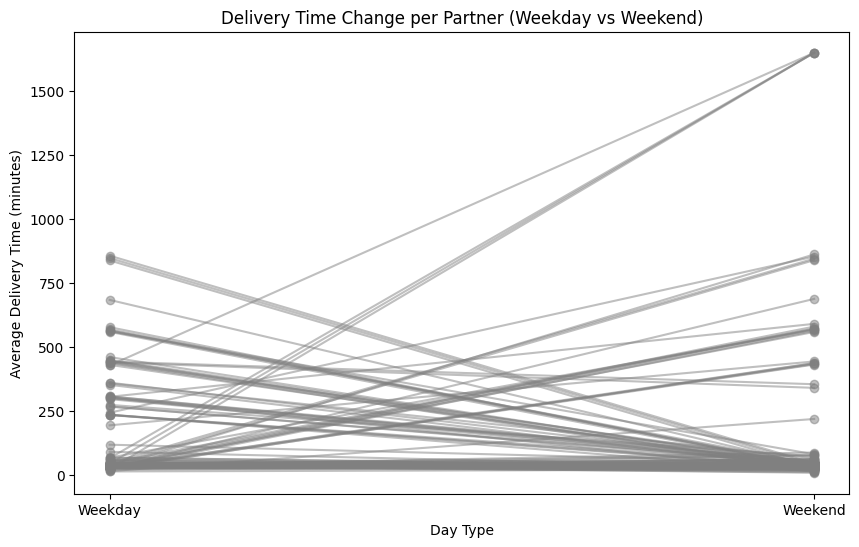

In [34]:
#code
from scipy.stats import ttest_rel


#Create Weekend / Weekday column
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['DayType'] = df['OrderDate'].dt.dayofweek.apply (lambda x: 'Weekend' if x >= 5 else 'Weekday')


# Average delivery time per partner per day type
paired_data = (df.groupby(['RestaurantID', 'DayType'])['DeliveryTime'] .mean() .unstack() .dropna())

weekday_times = paired_data['Weekday']
weekend_times = paired_data['Weekend']


#Paired T-Test
t_stat, p_value = ttest_rel(weekend_times, weekday_times)

print("Mean Difference (Weekend - Weekday):", (weekend_times - weekday_times).mean())
print("T-statistic:", t_stat)
print("P-value:", p_value)


# Visualization (Partner-wise Change)
plt.figure(figsize=(10, 6))
for i in range(len(paired_data)):
    plt.plot(['Weekday', 'Weekend'], [weekday_times.iloc[i], weekend_times.iloc[i]], marker='o', color='gray', alpha=0.5)

plt.title("Delivery Time Change per Partner (Weekday vs Weekend)")
plt.xlabel("Day Type")
plt.ylabel("Average Delivery Time (minutes)")
plt.show()


In [35]:
df.head() 

,OrderID,OrderDate,OrderTime,City,CustomerSegment,CuisineType,RestaurantID,RestaurantRating,OrderValue,DeliveryFee,...,DiscountAmount,PromoDiscount,TipAmount,TimePeriod,WeatherCondition,DayOfWeek,RestaurantCommission,NetRevenue,PaymentMethod,DayType
0,5001,2024-09-21,11:01,East Zone,New Customer,Fast Food,136,3.1,23.94,1.69,...,1.96,0.0,3.33,Morning,Clear,Saturday,4.788,17.192,Cash,Weekend
1,5002,2024-09-01,13:44,West Zone,Regular Customer,Mexican,140,4.6,18.58,4.58,...,2.71,0.0,3.40,Afternoon,Cloudy,Sunday,3.716,12.154,Card,Weekend
2,5003,2024-09-20,19:36,South Zone,VIP Customer,Chinese,112,4.3,79.19,9.53,...,2.49,0.0,0.00,Evening,Cloudy,Friday,15.838,60.862,Card,Weekday
3,5004,2024-09-30,10:38,South Zone,VIP Customer,Fast Food,142,4.7,39.85,8.91,...,0.19,0.0,0.00,Morning,Stormy,Monday,7.970,31.690,UPI,Weekday
4,5005,2024-09-09,10:13,East Zone,New Customer,American,202,3.9,15.15,5.18,...,2.27,0.0,3.15,Morning,Rainy,Monday,3.030,9.850,UPI,Weekday


**10. Paired T-Test: Before and After Promotional Campaign**

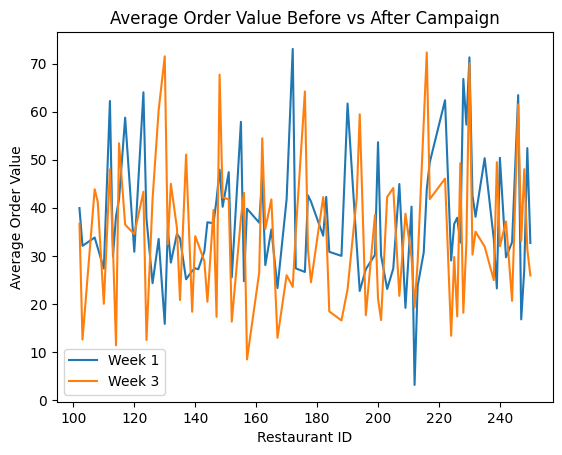

(-2.35375, 2.038207884312385, -1.1548135095130725, 0.25132887046415103)

In [36]:
import scipy.stats as stats
# Convert date and extract week number of month
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['WeekOfMonth'] = df['OrderDate'].dt.day.apply(lambda x: (x-1)//7 + 1)

# Filter Week 1 and Week 3
week1 = df[df['WeekOfMonth'] == 1].groupby('RestaurantID')['OrderValue'].mean().reset_index()
week3 = df[df['WeekOfMonth'] == 3].groupby('RestaurantID')['OrderValue'].mean().reset_index()

# Merge paired data
paired = pd.merge(week1, week3, on='RestaurantID', suffixes=('_Week1', '_Week3'))

# Paired differences
paired['Diff'] = paired['OrderValue_Week3'] - paired['OrderValue_Week1']

# Statistics
mean_diff = paired['Diff'].mean()
std_diff = paired['Diff'].std(ddof=1)
n = len(paired)
se = std_diff / np.sqrt(n)

t_stat, p_value = stats.ttest_rel(paired['OrderValue_Week3'], paired['OrderValue_Week1'])

# Visualization
plt.figure()
plt.plot(paired['RestaurantID'], paired['OrderValue_Week1'], label='Week 1')
plt.plot(paired['RestaurantID'], paired['OrderValue_Week3'], label='Week 3')
plt.xlabel("Restaurant ID")
plt.ylabel("Average Order Value")
plt.title("Average Order Value Before vs After Campaign")
plt.legend()
plt.show()

mean_diff, se, t_stat, p_value


# 📌 Insights from Food Delivery Data Analysis
1️⃣ Customer Satisfaction Is Service-Driven, Not Price-Driven

The analysis shows that there is no strong relationship between Order Value or Discount Amount and Customer Rating. This means that higher spending or larger discounts do not necessarily lead to higher customer satisfaction.

Insight:
👉 Customer satisfaction primarily depends on service quality, delivery experience, and consistency.

2️⃣ Delivery Time Is the Most Critical Factor

A negative relationship is observed between Delivery Time and Customer Rating. As delivery time increases, customer ratings tend to decrease.

Insight:
👉 Fast and reliable delivery is the strongest driver of customer satisfaction.

3️⃣ High Order Value Does Not Cause Delivery Delays

There is almost no correlation between Order Value and Delivery Time.

Insight:
👉 With proper logistics management, even large orders can be delivered quickly. High order value should not be blamed for delivery delays.

4️⃣ Discounts Boost Sales, Not Loyalty

A strong positive correlation exists between Discount Amount and Order Value, while the relationship between Discount Amount and Restaurant Rating is very weak.

Insight:
👉 Discounts increase short-term sales but do not ensure long-term customer loyalty or satisfaction.

5️⃣ Delivery Issues Are Case-Specific, Not City-Specific

Average delivery times are similar across all cities and zones. However, extreme delays (outliers) are present in every zone.

Insight:
👉 Operational problems are not zone-specific but occur in specific exceptional cases or failures.

6️⃣ Weekend Operations Face Higher Pressure

Paired t-test results indicate that delivery times on weekends are significantly higher than on weekdays.

Insight:
👉 Delivery capacity should be increased on weekends through additional riders or shifts to meet higher demand.

7️⃣ Promotional Campaign Impact Is Inconsistent

Before-and-after campaign analysis shows that the same campaign improved order values for some restaurants but reduced them for others.

Insight:
👉 A one-size-fits-all promotional strategy is ineffective; restaurant-specific campaigns are required.

8️⃣ Overall Business Conclusion

Overall, the platform’s core operations are relatively stable, but improvements are needed in the following areas:

✔ Delivery speed optimization
✔ Weekend capacity planning
✔ Enhanced experience for VIP and high-value customers
✔ Targeted promotions instead of blanket discounts

🔑 Final One-Line Insight

“Customer happiness is driven more by fast, reliable service than by discounts or high spending.”